# My titanic contest

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, preprocessing, linear_model, model_selection, metrics, ensemble
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(data.shape)
print(data.head())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [3]:
print(test.shape)
print(test.head())

(418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [4]:
test_ids = test.iloc[:,0]

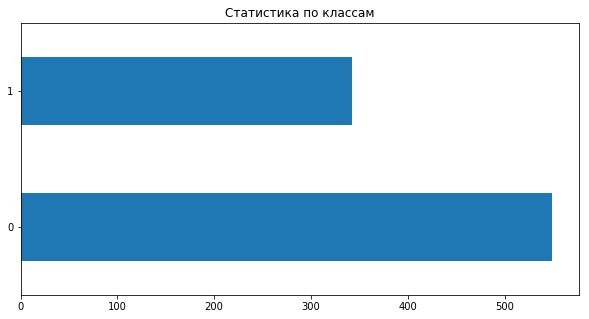

In [5]:
plt.figure(figsize=(10,5))
data['Survived'].value_counts().plot(kind='barh')
plt.title('Статистика по классам')
plt.show()

## 1. Пропущенные значения

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Разберемся с пропущенными значениями возраста
mean_age = round(data['Age'].mean(),1)
median_age = round(data['Age'].median(),1)
print(mean_age)
print(median_age)

data['Age'].fillna(median_age, inplace = True)

29.7
28.0


In [8]:
#Разберемся с пропущенными значениями порта отправления
moda_embarked = data['Embarked'].mode()[0]
data.Embarked.fillna(moda_embarked, inplace = True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#пропущенные значения в test
mean_fare = round(data['Fare'].mean(),1)
test['Age'].fillna(median_age, inplace = True)
test['Fare'].fillna(mean_fare, inplace = True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [11]:
#data[data.Cabin.isnull()==False]

## 2. Кодирование категориальных признаков

In [12]:
data['Sex'] = preprocessing.LabelEncoder().fit_transform(data['Sex'])
test['Sex'] = preprocessing.LabelEncoder().fit_transform(test['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int')
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype('int')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


## 3. Удаляем неиспользуемые колонки

In [14]:
data.drop(columns=['Ticket','Cabin', 'Name', 'PassengerId'], inplace=True)
test.drop(columns=['Ticket','Cabin', 'Name', 'PassengerId'], inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


## 4. Обучение модели

In [16]:
y = data['Survived']
X = data.drop(columns=['Survived'])
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,1,28.0,0,0,14.4583,1
648,3,1,28.0,0,0,7.5500,0
278,3,1,7.0,4,1,29.1250,2
31,1,0,28.0,1,0,146.5208,1
255,3,0,29.0,0,2,15.2458,1


### Логистическая регрессия

In [18]:
model = linear_model.LogisticRegression(random_state=0, solver='lbfgs')
model.fit(X_train, y_train)
result = model.predict(X_test)
roc_auc = metrics.roc_auc_score(y_test, result)
print("ROC AUC: ", roc_auc)
accuracy = metrics.accuracy_score(y_test, result)
print("Accuracy: ", accuracy)
clr = metrics.classification_report(y_test, result)
print(clr)

ROC AUC:  0.7976190476190477
Accuracy:  0.8097014925373134
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.74      0.75      0.75       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Random forest

In [19]:
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_result = rf_model.predict(X_test)
rf_roc_auc = metrics.roc_auc_score(y_test, rf_result)
print("ROC AUC: ", rf_roc_auc)
rf_accuracy = metrics.accuracy_score(y_test, rf_result)
print("Accuracy: ", rf_accuracy)
rf_clr = metrics.classification_report(y_test, rf_result)
print(rf_clr)

ROC AUC:  0.7795238095238095
Accuracy:  0.8022388059701493
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [479]:
result = rf_model.predict(test)
submission = pd.DataFrame({'PassengerId':test_ids,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions_1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions_1.csv


## 5. Доработка набора данных

In [20]:
data['Relatives'] = data['SibSp'] + data['Parch']
test['Relatives'] = test['SibSp'] + test['Parch']

data['Alone'] = 0
data.loc[data['Relatives'] == 0, 'Alone'] = 1
test['Alone'] = 0
test.loc[test['Relatives'] == 0, 'Alone'] = 1
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone
0,3,1,34.5,0,0,7.8292,2,0,1
1,3,0,47.0,1,0,7.0000,0,1,0
2,2,1,62.0,0,0,9.6875,2,0,1
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,2,0


In [21]:
data.drop(columns=['SibSp', 'Parch'], inplace=True)
test.drop(columns=['SibSp', 'Parch'], inplace=True)

## 6. Новая итерация обучения

In [22]:
y_new = data['Survived']
X_new = data.drop(columns=['Survived'])
(X_train_new, X_test_new, y_train_new, y_test_new) = model_selection.train_test_split(X_new, y_new, test_size=0.3, random_state=0)

In [23]:
new_model = linear_model.LogisticRegression(random_state=0, solver='lbfgs')
new_model.fit(X_train_new, y_train_new)
new_result = new_model.predict(X_test_new)
new_roc_auc = metrics.roc_auc_score(y_test_new, new_result)
print("ROC AUC: ", new_roc_auc)
new_accuracy = metrics.accuracy_score(y_test_new, new_result)
print("Accuracy: ", new_accuracy)
new_clr = metrics.classification_report(y_test_new, new_result)
print(new_clr)

ROC AUC:  0.7826190476190477
Accuracy:  0.7985074626865671
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.73      0.72      0.73       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [24]:
new_rf_model = ensemble.RandomForestClassifier()
new_rf_model.fit(X_train_new, y_train_new)
new_rf_result = new_rf_model.predict(X_test_new)
new_rf_roc_auc = metrics.roc_auc_score(y_test_new, new_rf_result)
print("ROC AUC: ", new_rf_roc_auc)
new_rf_accuracy = metrics.accuracy_score(y_test_new, new_rf_result)
print("Accuracy: ", new_rf_accuracy)
new_rf_clr = metrics.classification_report(y_test_new, new_rf_result)
print(new_rf_clr)

ROC AUC:  0.7726190476190476
Accuracy:  0.7910447761194029
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.73      0.70      0.71       100

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [485]:
result = new_rf_model.predict(test)
submission = pd.DataFrame({'PassengerId':test_ids,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions_20.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions_20.csv


## 7. Еще одна итерация

In [25]:
data['Fare_cat']=0
test['Fare_cat']=0
median_fare = data['Fare'].median()
data.loc[data['Fare'] > median_fare, 'Fare_cat'] = 1
test.loc[test['Fare'] > median_fare, 'Fare_cat'] = 1

data.drop(columns=['Fare'], inplace=True)
test.drop(columns=['Fare'], inplace=True)

data.head()

,Survived,Pclass,Sex,Age,Embarked,Relatives,Alone,Fare_cat
0,0,3,1,22.0,0,1,0,0
1,1,1,0,38.0,1,1,0,1
2,1,3,0,26.0,0,0,1,0
3,1,1,0,35.0,0,1,0,1
4,0,3,1,35.0,0,0,1,0


In [29]:
y_1 = data['Survived']
X_1 = data.drop(columns=['Survived'])
(X_train_1, X_test_1, y_train_1, y_test_1) = model_selection.train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [30]:
_model = linear_model.LogisticRegression(random_state=0, solver='lbfgs')
_model.fit(X_train_1, y_train_1)
_result = _model.predict(X_test_1)
_roc_auc = metrics.roc_auc_score(y_test_1, _result)
print("ROC AUC: ", _roc_auc)
_accuracy = metrics.accuracy_score(y_test_1, _result)
print("Accuracy: ", _accuracy)
_clr = metrics.classification_report(y_test_1, _result)
print(_clr)

ROC AUC:  0.7876190476190477
Accuracy:  0.8022388059701493
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.73      0.73       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [31]:
_rf_model = ensemble.RandomForestClassifier()
_rf_model.fit(X_train_1, y_train_1)
_rf_result = _rf_model.predict(X_test_1)
_rf_roc_auc = metrics.roc_auc_score(y_test_1, _rf_result)
print("ROC AUC: ", _rf_roc_auc)
_rf_accuracy = metrics.accuracy_score(y_test_1, _rf_result)
print("Accuracy: ", _rf_accuracy)
_rf_clr = metrics.classification_report(y_test_1, _rf_result)
print(_rf_clr)

ROC AUC:  0.756547619047619
Accuracy:  0.7835820895522388
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       168
           1       0.74      0.65      0.69       100

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [380]:
result = _rf_model.predict(test)
submission = pd.DataFrame({'PassengerId':test_ids,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions_2.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions_2.csv
